### Comments

In [1]:
## DUNNE has 6 electricity meters. Data from all the meters, 
## and their total values have been plotted below in lines 6-11.

## The Year-long data shows yearly trends, line 12. Energy use in summer is very low. 
## Energy increases in September to February. Then it drops again. 


## Weekly data shows weekdays and weekends, line 13 
## Daily data shows at what times the energy use increase and at what time it decreases, line 14.



### Import libraries

In [2]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

import time

from datetime import datetime
from dateutil import tz

from lxml import objectify

from bibliopixel import *
from bibliopixel.drivers.LPD8806 import *
from bibliopixel import LEDStrip
import bibliopixel.colors as colors

### Setting paths for different data files

In [3]:
path = ((141501550,'Dunne_16Jan2015_16Feb2016_meter141501550.xml'), 
        (141654340,'Dunne_16Jan2015_16Feb2016_meter141654340.xml'), 
        (141654341,'Dunne_16Jan2015_16Feb2016_meter141654341.xml'),
        (145019813,'Dunne_16Jan2015_16Feb2016_meter145019813.xml'),
        (230079804,'Dunne_16Jan2015_16Feb2016_meter230079804.xml'),
        (230083235,'Dunne_16Jan2015_16Feb2016_meter230083235.xml')
       )


In [4]:
tz_offset = -21600 + 3600 #Central DST
def xml_df(path, meterID):
    
    xml = objectify.parse(open(path))
    root = xml.getroot()
    obj_top = root.getchildren()[6].getchildren()[4].getchildren()
    length = len(obj_top)
    
    df = pd.DataFrame(columns=('duration', 'time_stamp', 'value', 'meter ID')) 
    
    for i in range(length): #takes a while to run 
        length2 = len(obj_top[i].getchildren())
        for j in range(1, length2): # element 0 is info. 
        
            obj = obj_top[i].getchildren()[j].getchildren()
            row = dict(zip(['duration', 'time_stamp', 'value', 'meter ID'], 
                           [int(obj[0].getchildren()[0]), int(obj[0].getchildren()[1])+tz_offset, float(obj[1]), meterID]))
            row_s = pd.Series(row)
            row_s.name = (i*length2) + (j-1)
            df = df.append(row_s)
            
    df['time_stamp']=pd.to_datetime(df['time_stamp'],unit='s')
    df['value']=df.value/1000
    
    return df



In [5]:
def gbplot(df,clr,meterID):
    ax=df.plot(x='time_stamp', y='value',title="Dunne-meter"+str(meterID),marker='.',color=clr)
    plt.gcf().autofmt_xdate()
    
    ax.set_xlabel("Date")
    ax.set_ylabel("kWh")
    
    #scatter(df1['datetime'],df1['value'])
    #ax.set_xlim(['2015-01-01 00:00:00','2016-03-07 00:00:00']) #FULL RANGE
    #ax.set_xlim(['2014-01-01 00:00:00','2014-12-31 00:00:00']) #Look at 2014
    #ax.set_xlim(['2015-09-01 00:00:00','2015-09-30 00:00:00']) #Look at September 2014
    #ax.set_xlim(['2015-09-07 00:00:00','2015-09-14 00:00:00']) #Look at One week in September 2014
    #ax.set_xlim(['2015-09-09 00:00:00','2015-09-10 00:00:00']) #Look at Weekday in September 2014
    return

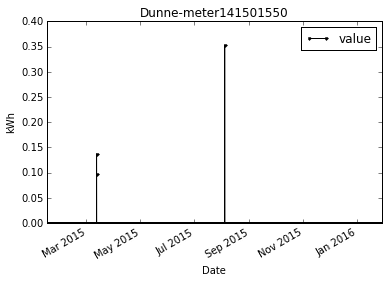

In [6]:
## Meter 1
meterID = path[0][0]
current_path = path[0][1]
df_1 = xml_df(current_path, meterID)

gbplot(df_1,'black',meterID)


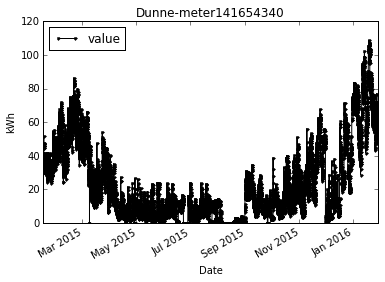

In [7]:
## Meter 2
meterID = path[1][0]
current_path = path[1][1]
df_2 = xml_df(current_path, meterID)

gbplot(df_2,'black',meterID)


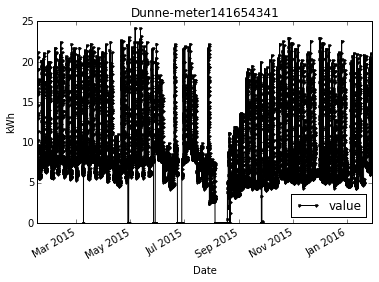

In [8]:
## Meter 3
meterID = path[2][0]
current_path = path[2][1]
df_3 = xml_df(current_path, meterID)

gbplot(df_3,'black',meterID)


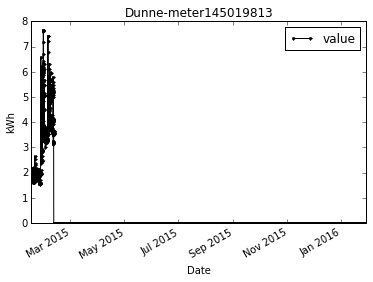

In [9]:
## Meter 4
meterID = path[3][0]
current_path = path[3][1]
df_4 = xml_df(current_path, meterID)

gbplot(df_4,'black',meterID)

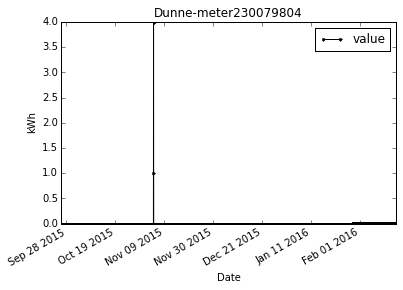

In [10]:
## Meter 5
meterID = path[4][0]
current_path = path[4][1]
df_5 = xml_df(current_path, meterID)

gbplot(df_5,'black',meterID)

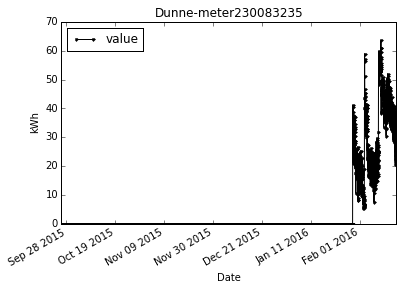

In [11]:
## Meter 6
meterID = path[5][0]
current_path = path[5][1]
df_6 = xml_df(current_path, meterID)

gbplot(df_6,'black',meterID)

### Yearly Trend

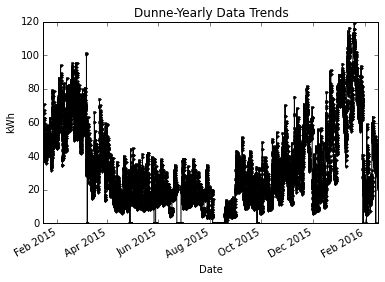

In [12]:
## Adding data from all meters

df_total = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])
df_total
df_group = df_total.groupby('time_stamp')
df_new = df_group['value'].sum()

ax = df_new.plot(x='time_stamp', y='value', title="Dunne-Yearly Data Trends",marker='.',color='black')

ax.set_xlabel("Date")
ax.set_ylabel("kWh")


### Weekly Trend

(0, 50)

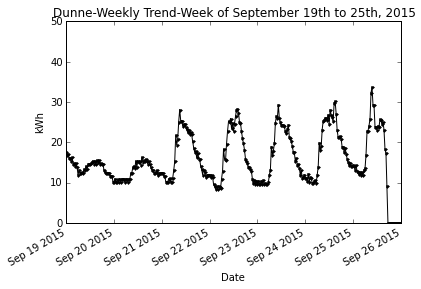

In [13]:
ax = df_new.plot(x='time_stamp', y='value', title="Dunne-Weekly Trend-Week of September 19th to 25th, 2015",marker='.',color='black')

ax.set_xlabel("Date")
ax.set_ylabel("kWh")

ax.set_xlim(['2015-9-19 00:00:00','2015-9-26 00:00:00'])  ## For 1 day value
ax.set_ylim([0,50])

###Daily Trend

(0, 50)

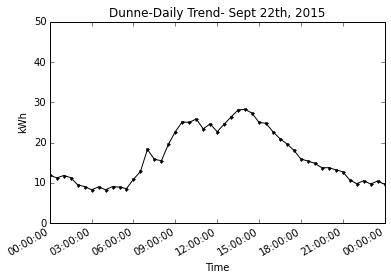

In [18]:
ax = df_new.plot(x='time_stamp', y='value', title="Dunne-Daily Trend- Sept 22th, 2015",marker='.',color='black')

ax.set_xlabel("Time")
ax.set_ylabel("kWh")

ax.set_xlim(['2015-09-22 00:00:00','2015-09-23 00:00:00']) ## For 1 day in September
ax.set_ylim([0,50])

### Saving the data

In [15]:
df_new.to_pickle('Dunne_Daily_Average')
df_total.to_pickle('All_meters_concat')

In [16]:
df_new.to_csv('Dunne_Daily_Average.csv', sep=',')
df_total.to_csv('Dunne_All_Meters_Concat.csv')
